In [52]:
from math import sqrt
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Degrees of fredom for any node

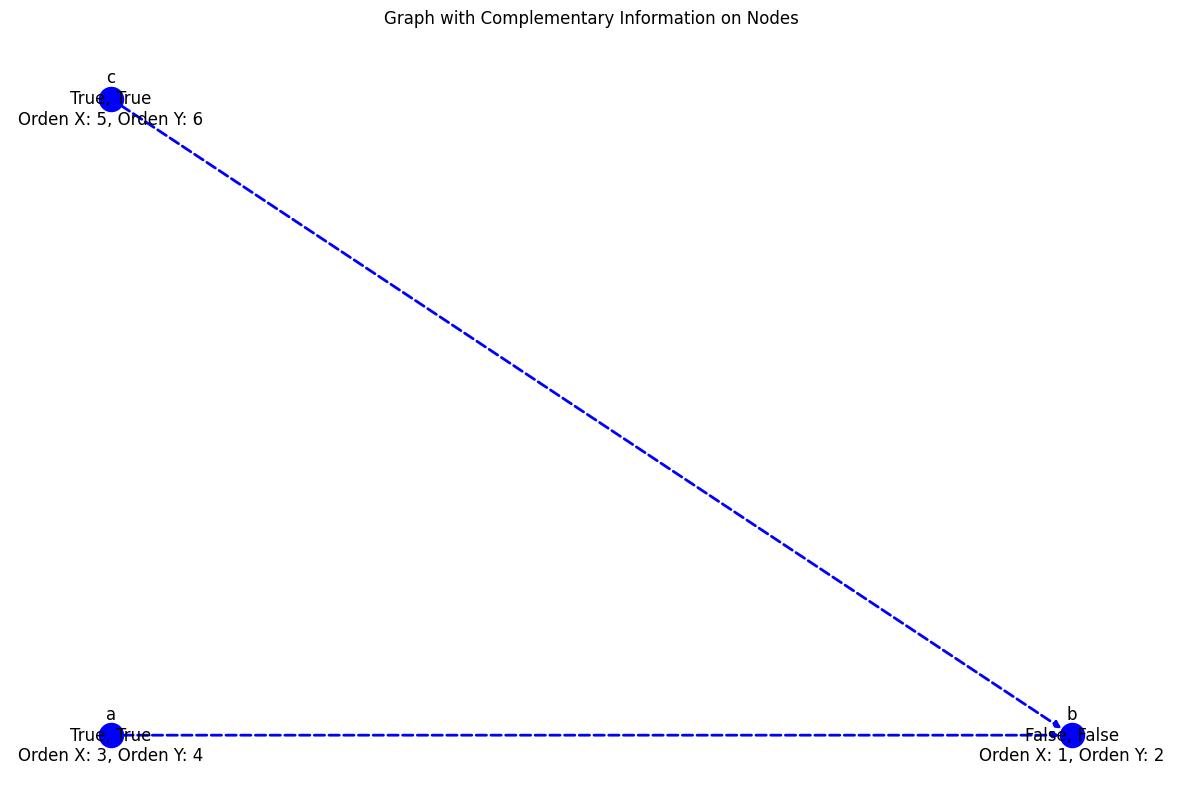

In [ ]:
# Define the locations and edges
locations = {
    'a': (0, 0),
    'b': (240, 0),
    'c': (0, 180),
}
edges = [
    ('a', 'b'),
    ('c', 'b')
]

# Define complementary information for each node
node_info = {
    'a': {'coord_x':0, 'coord_y':0, 'restriccion_x': True, 'restriccion_y': True, 'orden_x': 3, 'orden_y': 4},
    'b': {'coord_x':240, 'coord_y':0,'restriccion_x': False, 'restriccion_y': False, 'orden_x': 1, 'orden_y': 2},
    'c': {'coord_x':0, 'coord_y':180, 'restriccion_x': True, 'restriccion_y': True, 'orden_x': 5, 'orden_y': 6},
}

# Create directed graph and add edges
G = nx.DiGraph()
G.add_edges_from(edges)

# Add complementary information as node attributes
for node, info in node_info.items():
    G.nodes[node].update(info)

# Draw the graph
plt.figure(figsize=(15, 10))
temp = [e for e in edges]  # Temporary list for the path of vehicle 0
temp_nodes = [n for n in locations]  # Temporary list for the nodes of vehicle 0

# Draw nodes and edges with specific style
nx.draw_networkx_nodes(G, locations, nodelist=[x for x in temp_nodes], node_color='b')
nx.draw_networkx_edges(G, locations, edgelist=temp, width=2, edge_color='b', style='dashed')

# Create labels with complementary information
labels = {node: f"{node}\n{G.nodes[node]['restriccion_x']}, {G.nodes[node]['restriccion_y']}\n"
                  f"Orden X: {G.nodes[node]['orden_x']}, Orden Y: {G.nodes[node]['orden_y']}"
          for node in G.nodes}

# Draw the labels
nx.draw_networkx_labels(G, locations, labels=labels, font_size=12)

plt.title("Graph with Complementary Information on Nodes")
plt.axis('off')
plt.show()


In [21]:
G.nodes['a']

{'coord_x': 0,
 'coord_y': 0,
 'restriccion_x': True,
 'restriccion_y': True,
 'orden_x': 3,
 'orden_y': 4}

In [ ]:
barras = [x + y for x, y in edges]
barras

['ab', 'cb']


In [29]:
ni = [e[0] for e in barras]
nj= [e[1] for e in barras]
ni, nj

(['a', 'c'], ['b', 'b'])

In [ ]:
xi = [G.nodes[i]['coord_x'] for i in ni]
xj = [G.nodes[j]['coord_x'] for j in nj]
xi, xj

([0, 0], [240, 240])

In [36]:
yi = [G.nodes[i]['coord_y'] for i in ni]
yj = [G.nodes[j]['coord_y'] for j in nj]
yi, yj

([0, 180], [0, 0])

In [ ]:
def distance(i):
    return sqrt((xj[i]-xi[i])**2 + (yj[i]-yi[i])**2)

l = [distance(i) for i in range(len(barras))]
l

[240.0, 300.0]

In [50]:
def get_cx(i):
    return (xj[i]-xi[i])/l[i]

def get_cy(i):
    return (yj[i]-yi[i])/l[i]
    
cx = [get_cx(i) for i in range(len(barras))]
cy = [get_cy(i) for i in range(len(barras))]
cx, cy

([1.0, 0.8], [0.0, -0.6])

In [54]:
df = pd.DataFrame({
    'barra': barras,
    'Ni': ni,
    'Nj': nj,
    'Xi': xi,
    'Xj': xj,
    'Yi': yi,
    'Yj': yj,
    'L': l,
    'Cx': cx,
    'Cy': cy
})
df

,barra,Ni,Nj,Xi,Xj,Yi,Yj,L,Cx,Cy
0,ab,a,b,0,240,0,0,240.0,1.0,0.0
1,cb,c,b,0,240,180,0,300.0,0.8,-0.6


In [ ]:
df

In [ ]:
#Ni sería el primer elemento de la barra
#Nj será el segundo elemento de barra
